# <center>Análise da base German Risk Credit utilizando SVC</center>

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Leitura do Arquivo
df = pd.read_csv("german_credit_data.csv")

In [4]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


## Tratamento dos Dados

###  Removendo Dados Null

In [5]:
#Colunas que possuem dados null
null_columns = df.columns[df.isnull().any()]
null_columns

Index(['Saving accounts', 'Checking account'], dtype='object')

In [6]:
#Indice das linhas nulas na coluna Saving Accounts
remove_Saving = df.loc[df[null_columns[0]].isnull()].index
remove_Saving

Int64Index([  0,   5,  16,  17,  24,  33,  50,  53,  55,  56,
            ...
            942, 947, 956, 962, 965, 968, 977, 990, 992, 994],
           dtype='int64', length=183)

In [7]:
df_new = df.drop(remove_Saving)

In [8]:
#Indice das linhas nulas na coluna Checking account
remove_Checking = df_new.loc[df_new[null_columns[1]].isnull()].index
remove_Checking

Int64Index([  2,   6,   8,  19,  20,  26,  36,  40,  45,  46,
            ...
            967, 971, 974, 978, 981, 984, 987, 991, 995, 997],
           dtype='int64', length=295)

In [9]:
df_new.drop(remove_Checking, inplace=True)

In [10]:
#Resetando os indices
df_new = df_new.reset_index()

In [11]:
df_new.columns

Index(['index', 'Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing',
       'Saving accounts', 'Checking account', 'Credit amount', 'Duration',
       'Purpose', 'Risk'],
      dtype='object')

In [12]:
# Deletando as colunas index e Unnamed:0
del_columns = ['index', 'Unnamed: 0']
df_new.drop(del_columns, axis = 1, inplace = True)

In [13]:
df_new

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad
5,25,female,2,rent,little,moderate,1295,12,car,bad
6,24,female,2,rent,little,little,4308,48,business,bad
7,22,female,2,own,little,moderate,1567,12,radio/TV,good
8,60,male,1,own,little,little,1199,24,car,bad
9,28,female,2,rent,little,little,1403,15,car,good


### Trocando campos de texto para numerico

In [14]:
df_new.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

#### Campos de texto : Sex, Housing, Saving accounts, Checking account, Purpose

In [15]:
#Exibe os valores possiveis deste campo
df_new['Sex'].unique()

array(['female', 'male'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder

#Realiza a troca de string por valores numericos nas colunas passadas
df_new['Sex'] = LabelEncoder().fit_transform(df_new['Sex'])

In [17]:
df_new

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,0,2,own,little,moderate,5951,48,radio/TV,bad
1,45,1,2,free,little,little,7882,42,furniture/equipment,good
2,53,1,2,free,little,little,4870,24,car,bad
3,35,1,3,rent,little,moderate,6948,36,car,good
4,28,1,3,own,little,moderate,5234,30,car,bad
5,25,0,2,rent,little,moderate,1295,12,car,bad
6,24,0,2,rent,little,little,4308,48,business,bad
7,22,0,2,own,little,moderate,1567,12,radio/TV,good
8,60,1,1,own,little,little,1199,24,car,bad
9,28,0,2,rent,little,little,1403,15,car,good


In [107]:
df_new['Housing'] = LabelEncoder().fit_transform(df_new['Housing'])
df_new['Saving accounts'] = LabelEncoder().fit_transform(df_new['Saving accounts'])
df_new['Checking account'] = LabelEncoder().fit_transform(df_new['Checking account'])
df_new['Purpose'] = LabelEncoder().fit_transform(df_new['Purpose'])
df_new['Risk'] = LabelEncoder().fit_transform(df_new['Risk'])

In [108]:
df_new

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,0,2,1,0,1,5951,48,5,0
1,45,1,2,0,0,0,7882,42,4,1
2,53,1,2,0,0,0,4870,24,1,0
3,35,1,3,2,0,1,6948,36,1,1
4,28,1,3,1,0,1,5234,30,1,0
5,25,0,2,2,0,1,1295,12,1,0
6,24,0,2,2,0,0,4308,48,0,0
7,22,0,2,1,0,1,1567,12,5,1
8,60,1,1,1,0,0,1199,24,1,0
9,28,0,2,2,0,0,1403,15,1,1


## Separando em base de teste e treino

In [109]:
# Dados de entrada
x = df_new.iloc[:,:-1].values
x

array([[  22,    0,    2, ..., 5951,   48,    5],
       [  45,    1,    2, ..., 7882,   42,    4],
       [  53,    1,    2, ..., 4870,   24,    1],
       ...,
       [  40,    1,    3, ..., 3857,   30,    1],
       [  23,    1,    2, ..., 1845,   45,    5],
       [  27,    1,    2, ..., 4576,   45,    1]])

In [110]:
# Dados de Saida

y = df_new['Risk'].values
y

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,

In [111]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [112]:
x_train

array([[  55,    0,    0, ..., 1190,   18,    6],
       [  63,    1,    2, ...,  781,   10,    1],
       [  25,    0,    2, ..., 1206,    9,    5],
       ...,
       [  43,    1,    2, ..., 1203,    6,    1],
       [  24,    1,    2, ..., 3016,   12,    5],
       [  65,    1,    2, ...,  571,   21,    1]])

In [113]:
x_test

array([[   26,     1,     2,     1,     0,     0,  1345,    18,     5],
       [   23,     0,     2,     2,     0,     0,  1216,    18,     1],
       [   24,     0,     2,     2,     0,     0,  4308,    48,     0],
       [   25,     1,     2,     2,     2,     1,  3213,    18,     5],
       [   27,     1,     0,     1,     3,     2,   709,     6,     1],
       [   23,     0,     1,     2,     0,     0,  3234,    24,     4],
       [   27,     1,     2,     1,     1,     1,  4576,    45,     1],
       [   22,     0,     2,     1,     0,     1,  1670,     9,     5],
       [   38,     1,     3,     0,     0,     0, 10623,    30,     1],
       [   46,     0,     1,     1,     0,     2,  2251,    12,     4],
       [   32,     0,     1,     1,     1,     0,  1282,    24,     5],
       [   57,     0,     1,     1,     2,     2,  1258,    24,     5],
       [   29,     1,     2,     1,     0,     0,  6887,    36,     3],
       [   41,     1,     2,     1,     0,     0,  2712,    36, 

In [45]:
dir(y_test)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [114]:
#Retorna a quantidade de bad e goods no y_train
unique, counts = np.unique(y_train, return_counts = True)

In [115]:
dict(zip(unique, counts))

{0: 181, 1: 236}

In [116]:
#Retorna a quantidade de bad e goods no y_test
unique, counts = np.unique(y_test, return_counts = True)
dict(zip(unique,counts))

{0: 50, 1: 55}

In [117]:
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [187]:
classifier = SVC(kernel = 'linear',  C = 0.5).fit(x_train, y_train)
classifier

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [188]:
y_predict = classifier.predict(x_test)

Confusion matrix, without normalization
[[30 20]
 [21 34]]
Normalized confusion matrix
[[0.6  0.4 ]
 [0.38 0.62]]


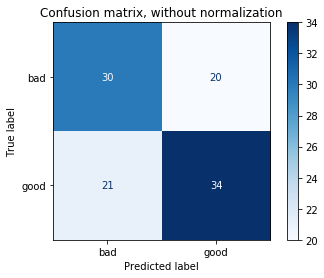

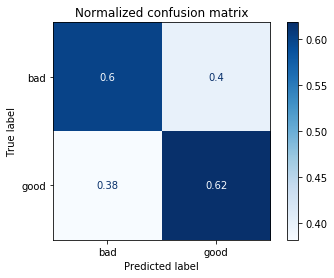

In [189]:
np.set_printoptions(precision=2)
class_names = ['bad', 'good']
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [190]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_predict)
matrix

array([[30, 20],
       [21, 34]])

In [191]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predict, normalize = True)
acc

0.6095238095238096